# Casi nelle Province

Casi, incidenza e prevalenza nelle province.

> Max Pierini

***

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
sns.set()

from IPython.display import Markdown, HTML

In [2]:
df = pd.read_csv(
    "https://github.com/pcm-dpc/COVID-19/raw/master/dati-province/"
    "dpc-covid19-ita-province.csv",
    parse_dates=['data']
)
df['data'] = df.data.dt.normalize()

In [3]:
pop = pd.read_csv('popolazione_province.csv')

In [4]:
pop.loc[pop.Territorio.str.contains('Aosta'), 'Territorio'] = 'Aosta'

In [5]:
pop.loc[pop.Territorio.str.contains('Massa'), 'Territorio'] = 'Massa Carrara'

In [6]:
pop.loc[pop.Territorio.str.contains('Bolzano'), 'Territorio'] = 'Bolzano'

In [7]:
fixed_pop = pop.drop_duplicates(subset=['Territorio'])[['Territorio', 'Value']].copy(deep=True)

In [8]:
fixed_pop.columns = ['territorio', 'popolazione']

In [9]:
df.loc[(df.denominazione_provincia=='Bolzano')&(df.data=='2020-10-07'), 'totale_casi'] = 3700

In [10]:
df = df.merge(
    fixed_pop,
    left_on='denominazione_provincia',
    right_on='territorio'
)
df['prevalenza'] = df.totale_casi / df.popolazione

In [11]:
df.loc[df.totale_casi<=0, 'totale_casi'] = np.nan

# Totale casi

In [12]:
cmax_df = df[df.data==df.data.max()].sort_values(by='totale_casi', ascending=False).head(10)

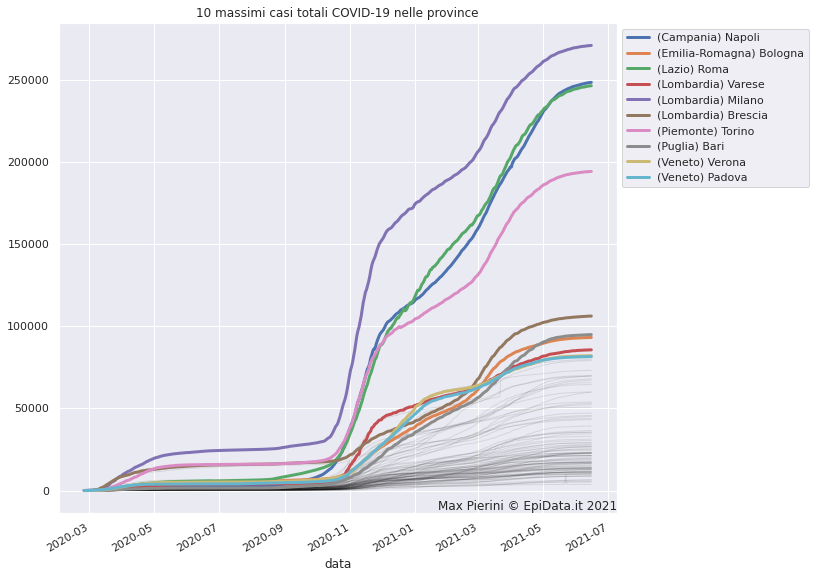

In [13]:
# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

fig, ax = plt.subplots(figsize=(10, 10))

for prov in df.denominazione_provincia.unique():
    df_prov = df[df.denominazione_provincia==prov].copy(deep=True)
    df_prov.fillna(method='ffill', inplace=True)
    reg = df_prov.denominazione_regione.unique()[0]

    if prov not in cmax_df.denominazione_provincia.values:
        ax.plot(df_prov.data, df_prov.totale_casi, color='k', alpha=.1, lw=1, label=None)
    else:
        df_prov.plot(x='data', y='totale_casi', zorder=100, ax=ax, lw=3, label=f"({reg}) {prov}")
ax.text(
    1, 0,
    'Max Pierini © EpiData.it 2021',
    ha='right', va='bottom',
    transform=ax.transAxes,
    fontsize=12
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set(
    title='10 massimi casi totali COVID-19 nelle province'
)
plt.show()

In [14]:
cmax_df[
    ['denominazione_provincia', 'denominazione_regione', 'totale_casi']
].set_index('denominazione_provincia').style.set_caption(
    "TOTALE CASI"
).format({'totale_casi': int})

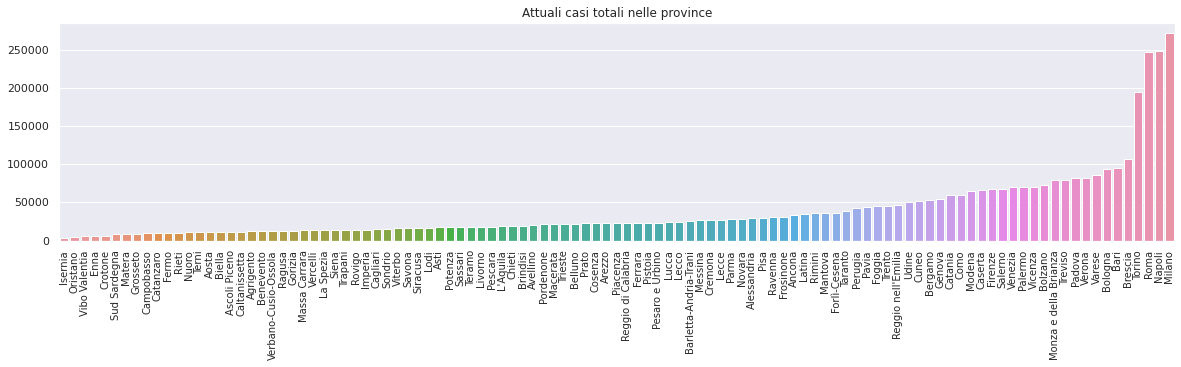

In [15]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(
    data=df[df.data==df.data.max()].sort_values(by='totale_casi'),
    x='denominazione_provincia',
    y='totale_casi',
    ax=ax,
)
plt.xticks(rotation=90, fontsize=10)
ax.set(
    xlabel=None, ylabel=None,
    title='Attuali casi totali nelle province'
)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
plt.show()

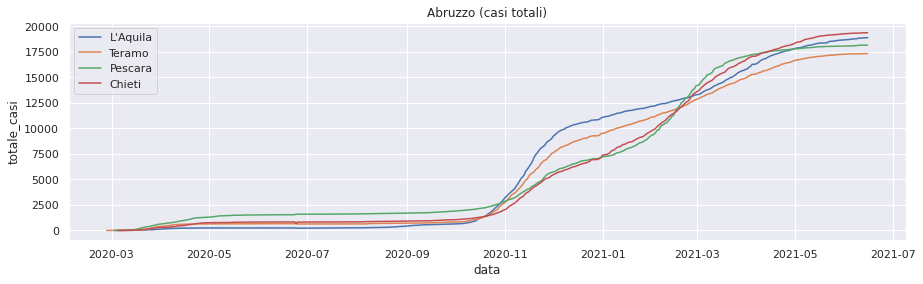

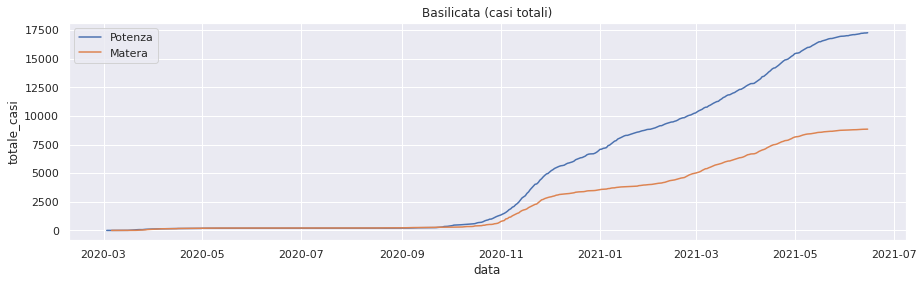

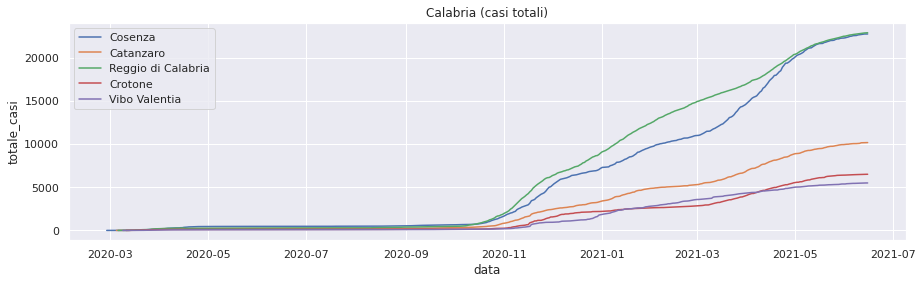

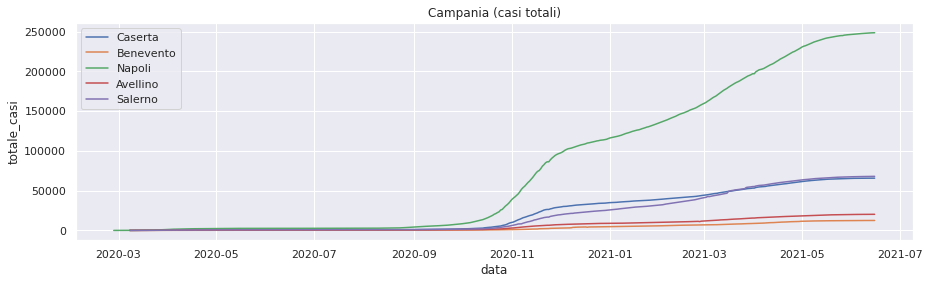

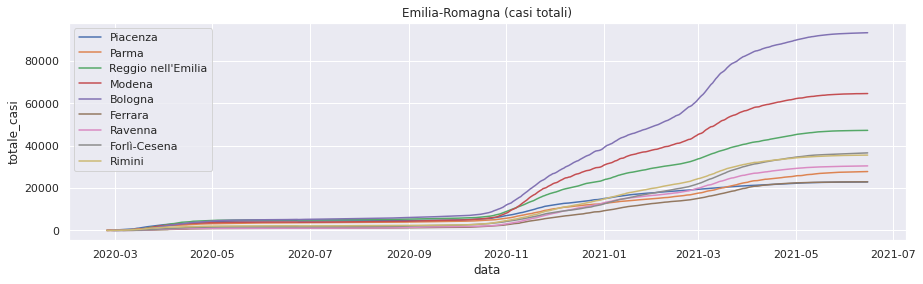

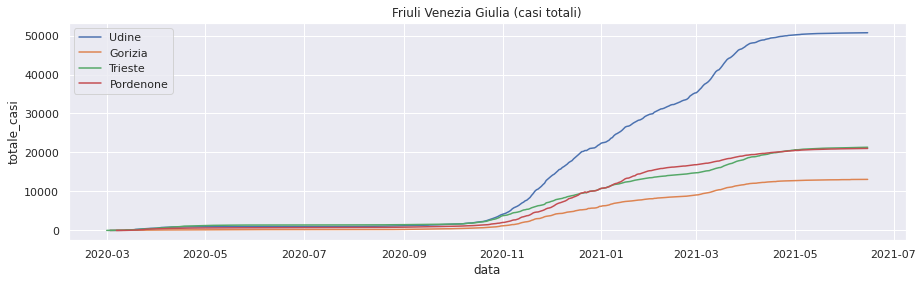

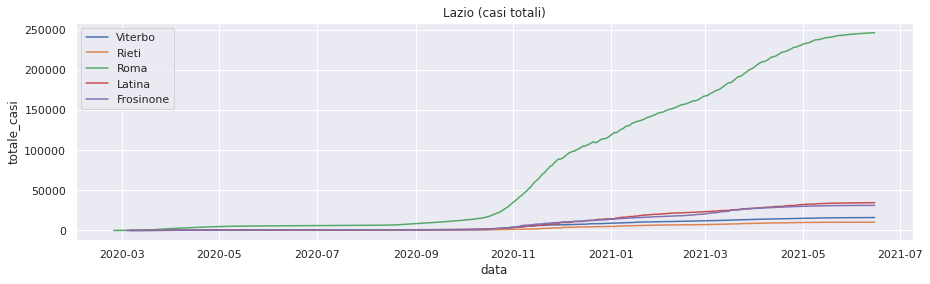

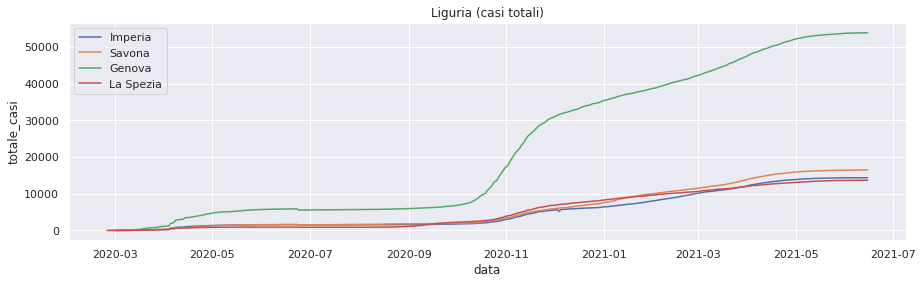

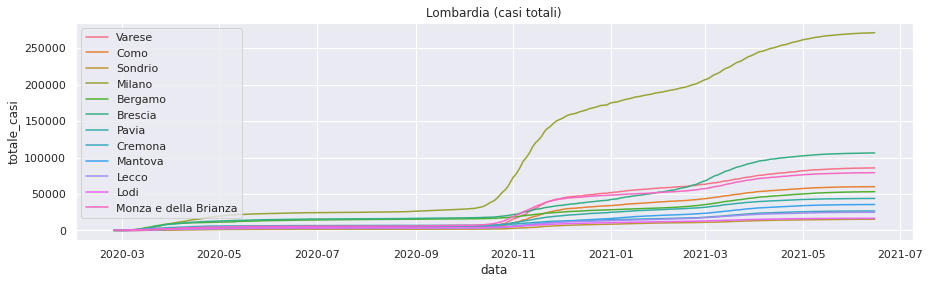

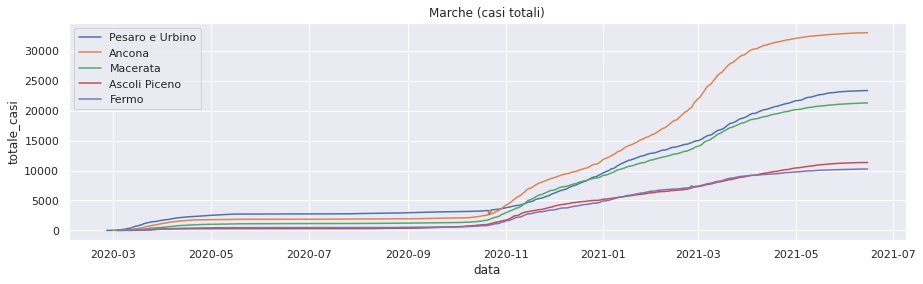

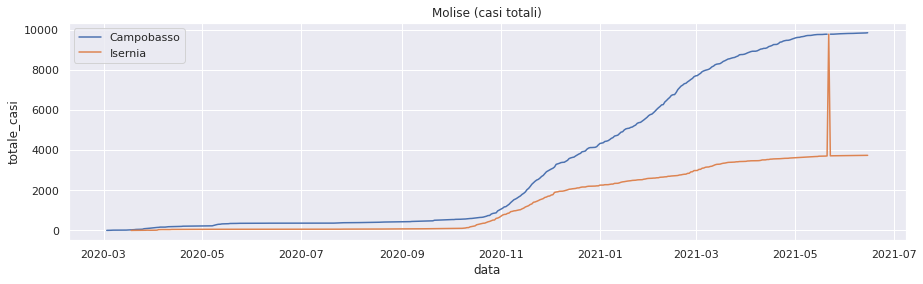

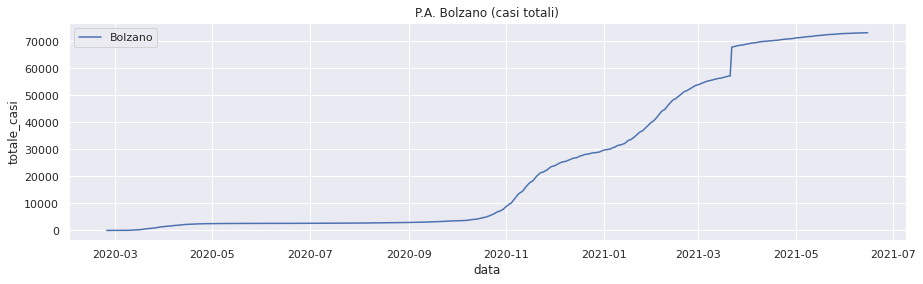

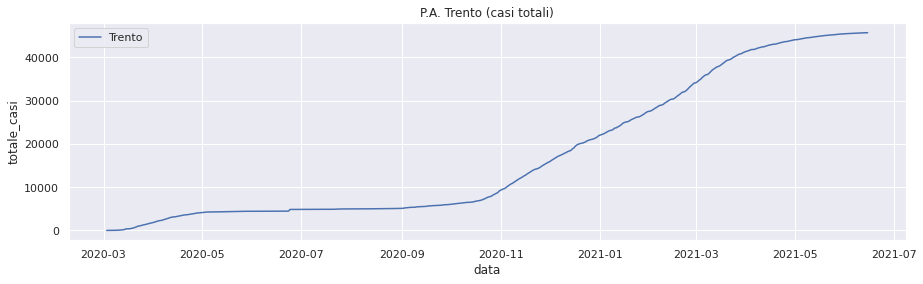

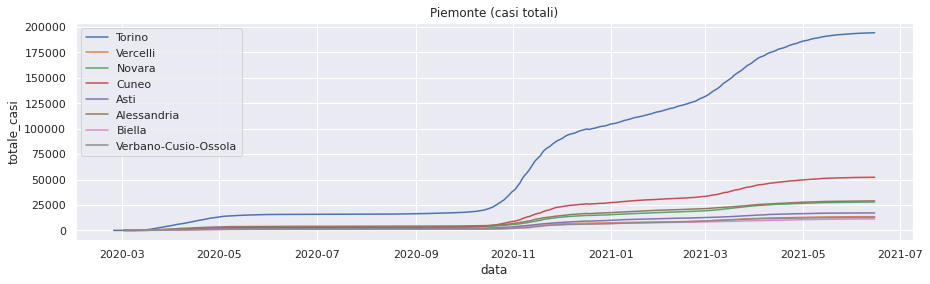

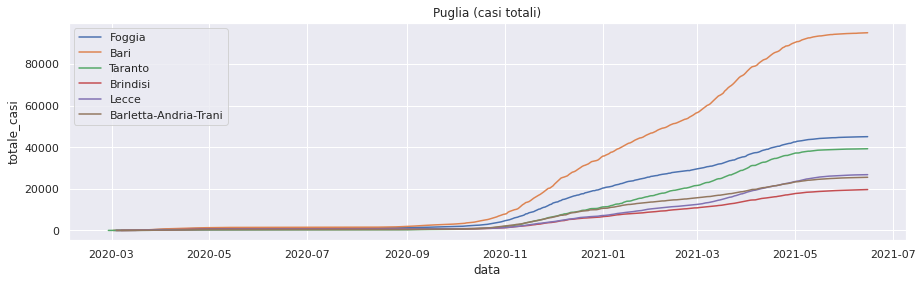

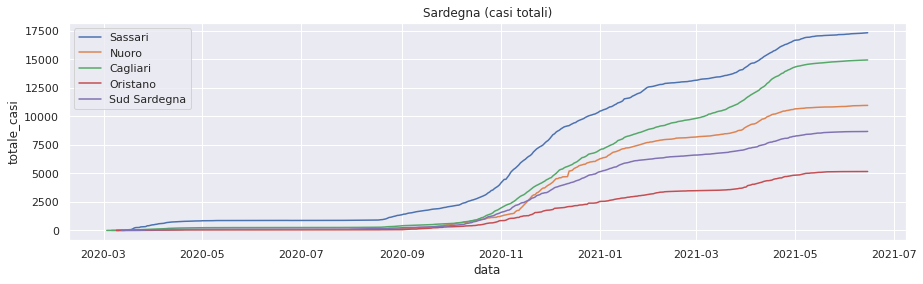

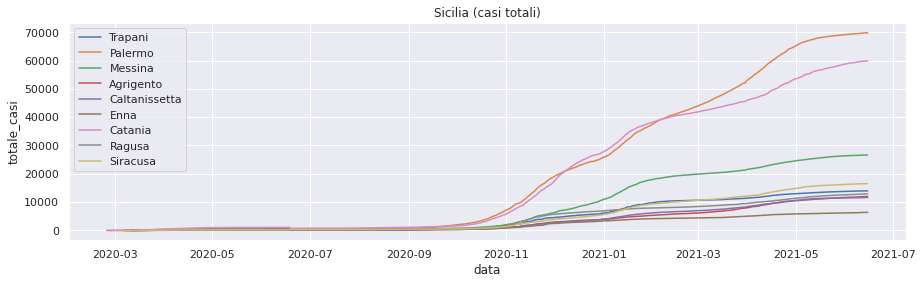

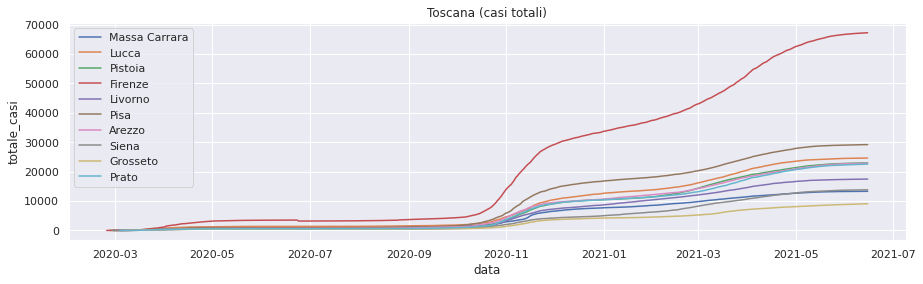

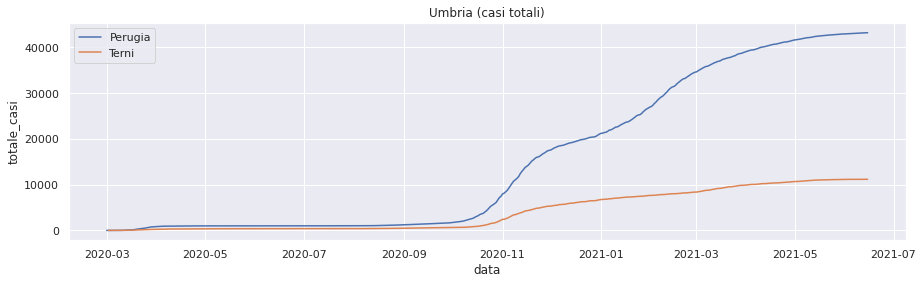

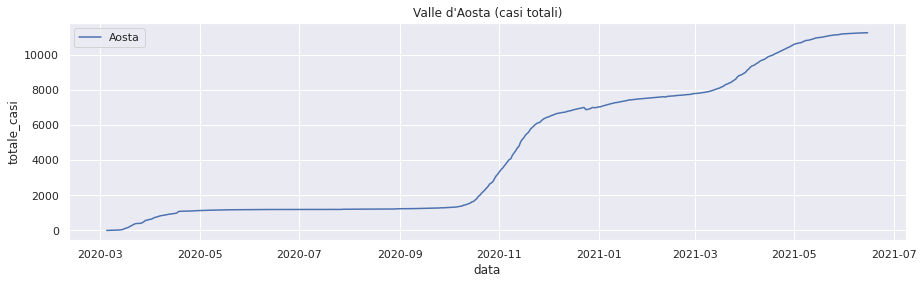

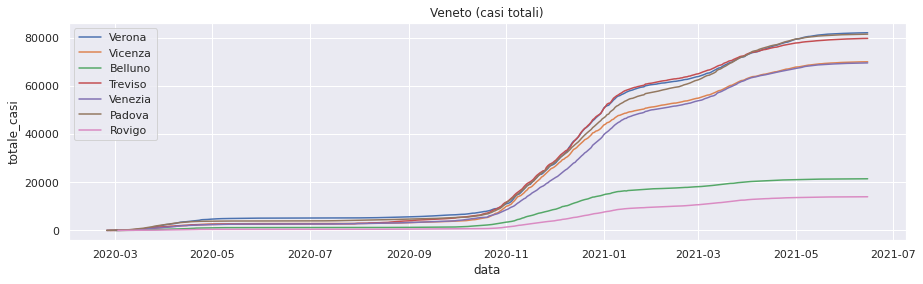

In [16]:
for i, regione in enumerate(sorted(df.denominazione_regione.unique())):
    fig, ax = plt.subplots(figsize=(15, 4))
    _df = df[df.denominazione_regione==regione]
    sns.lineplot(
        data=_df,
        x='data', y='totale_casi',
        hue='denominazione_provincia',
        ax=ax
    )
    ax.set(
        title=f"{regione} (casi totali)",
    )
    ax.legend(loc='upper left')
    plt.show()
    s = _df[_df.data==_df.data.max()].sort_values(by='denominazione_provincia')[
        ['denominazione_provincia', 'totale_casi']
    ].set_index('denominazione_provincia').style.set_caption(
        f"TOTALE CASI in {regione} (ultimi dati)"
    ).format({'totale_casi': int})
    display(HTML(s.render()))

# Prevalenza

In [17]:
pmax_df = df[df.data==df.data.max()].sort_values(by='prevalenza', ascending=False).head(10)

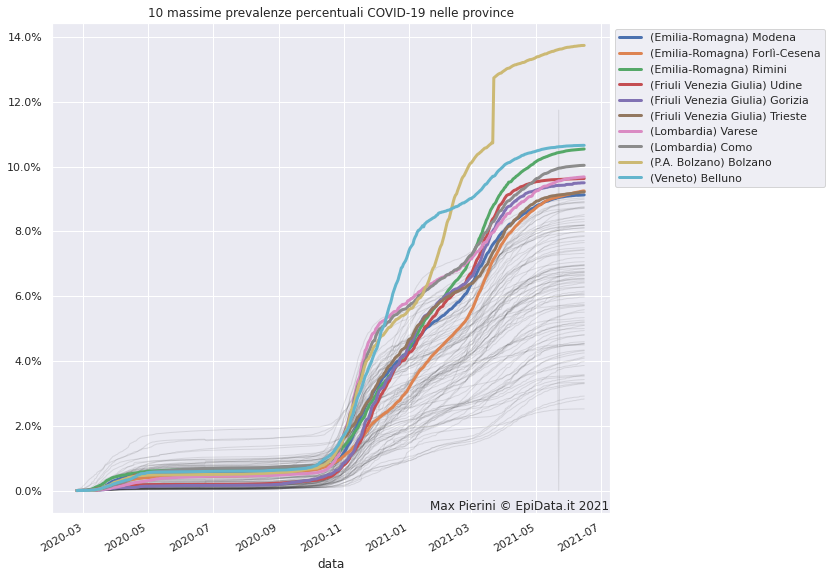

In [18]:
# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

fig, ax = plt.subplots(figsize=(10, 10))

for prov in df.denominazione_provincia.unique():
    df_prov = df[df.denominazione_provincia==prov].copy(deep=True)
    df_prov.fillna(method='ffill', inplace=True)
    reg = df_prov.denominazione_regione.unique()[0]

    if prov not in pmax_df.denominazione_provincia.values:
        ax.plot(df_prov.data, df_prov.prevalenza, color='k', alpha=.1, lw=1, label=None)
    else:
        df_prov.plot(x='data', y='prevalenza', zorder=100, ax=ax, lw=3, label=f"({reg}) {prov}")
ax.text(
    1, 0,
    'Max Pierini © EpiData.it 2021',
    ha='right', va='bottom',
    transform=ax.transAxes,
    fontsize=12
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set(
    title='10 massime prevalenze percentuali COVID-19 nelle province'
)
plt.show()

In [19]:
pmax_df[
    ['denominazione_provincia', 'denominazione_regione', 'prevalenza']
].set_index('denominazione_provincia').style.set_caption(
    "PREVALENZA"
).format({'prevalenza': '{:.2%}'})

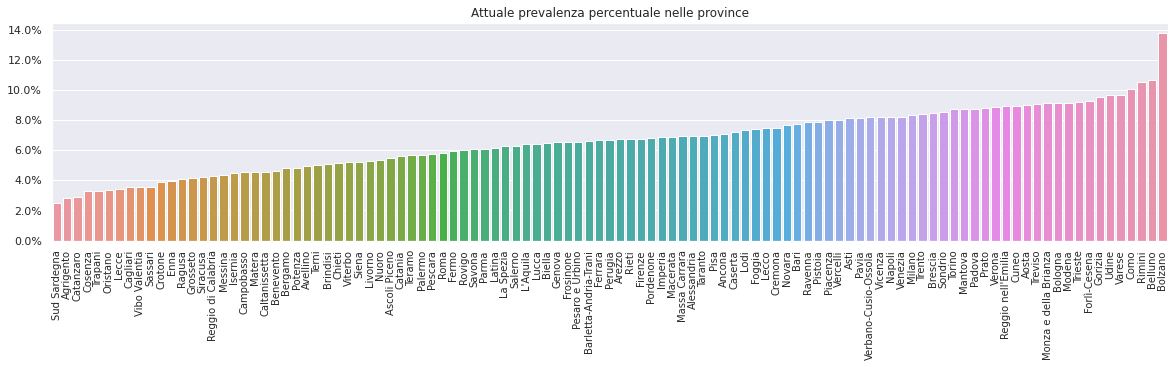

In [20]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(
    data=df[df.data==df.data.max()].sort_values(by='prevalenza'),
    x='denominazione_provincia',
    y='prevalenza',
    ax=ax,
)
plt.xticks(rotation=90, fontsize=10)
ax.set(
    xlabel=None, ylabel=None,
    title='Attuale prevalenza percentuale nelle province'
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
plt.show()

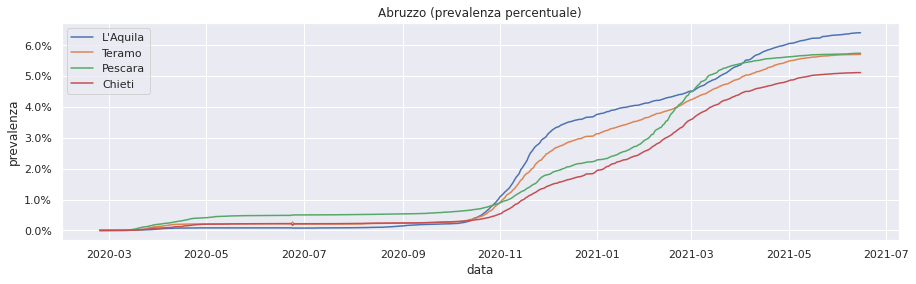

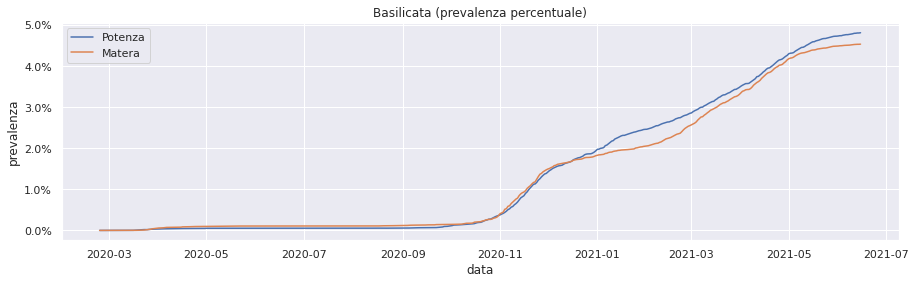

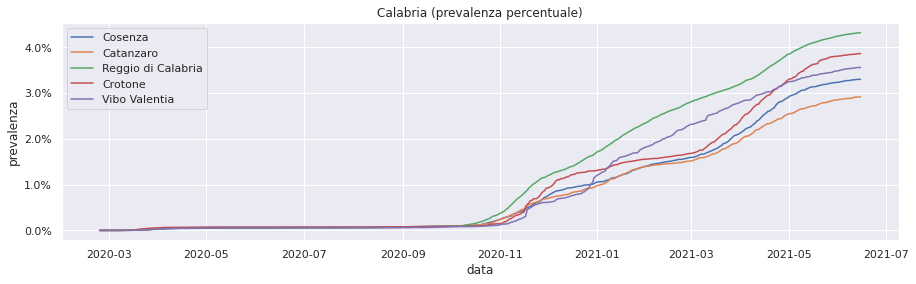

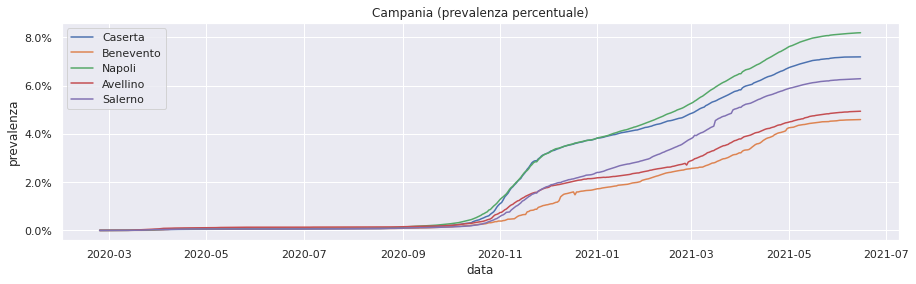

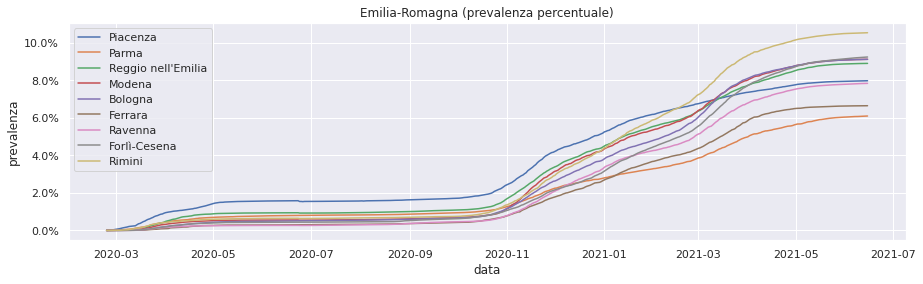

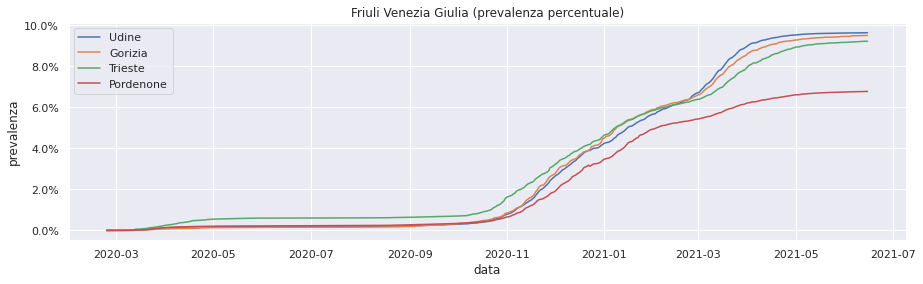

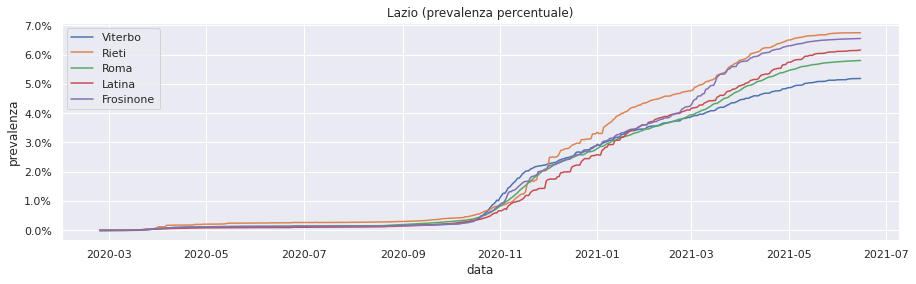

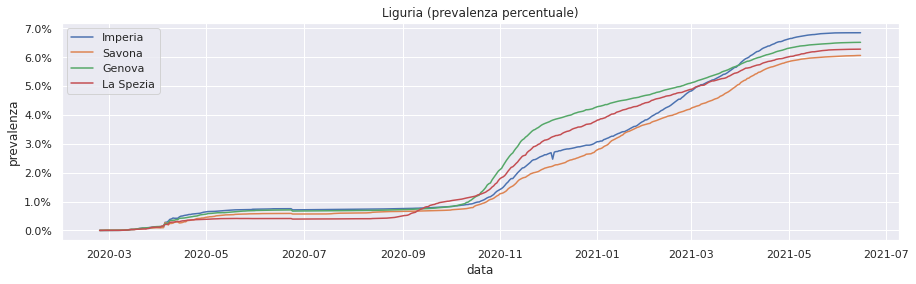

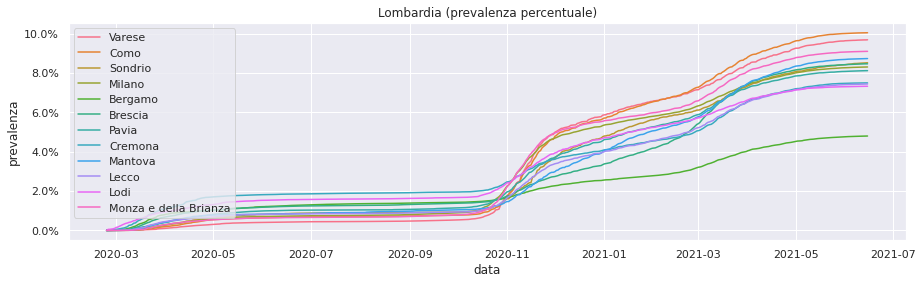

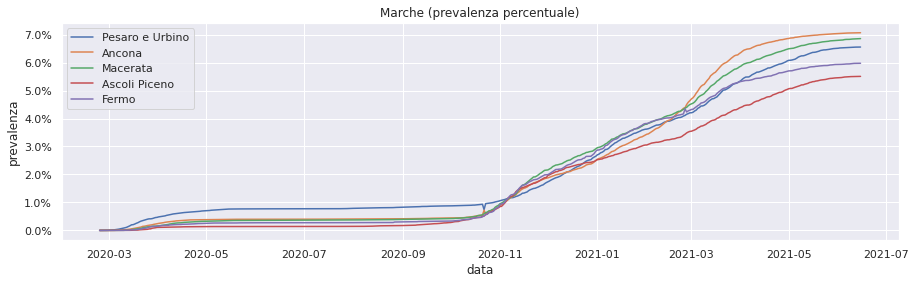

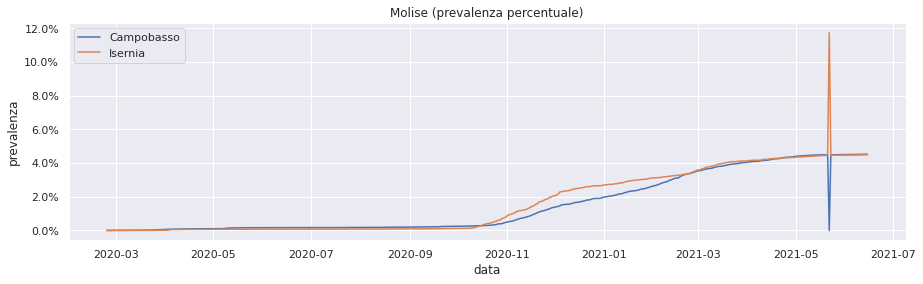

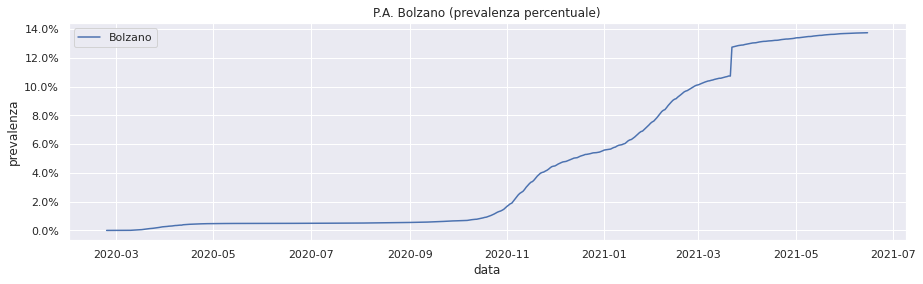

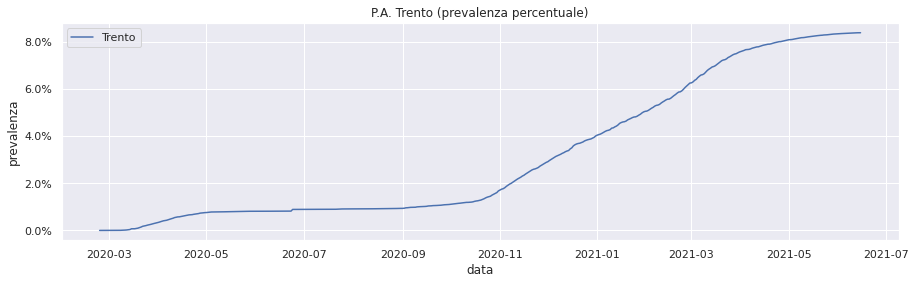

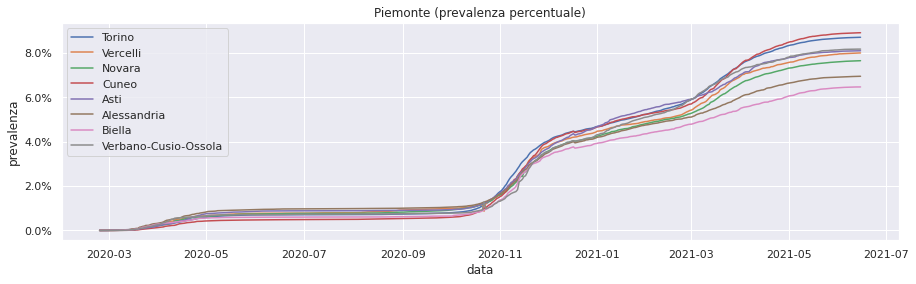

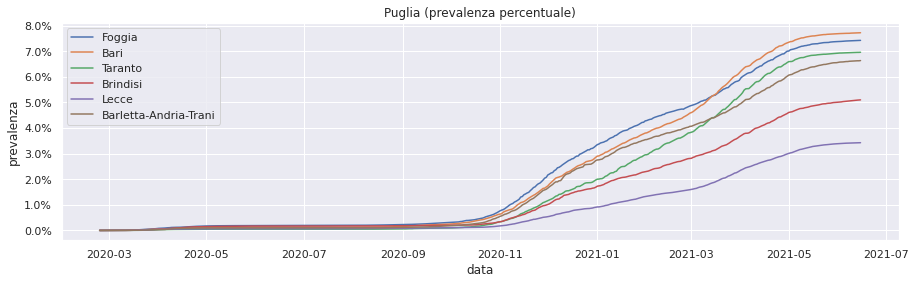

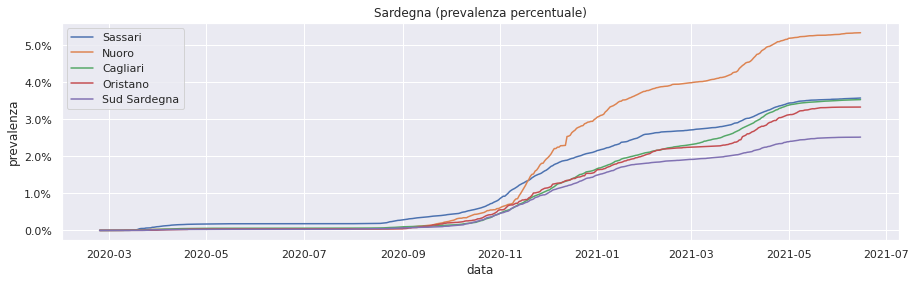

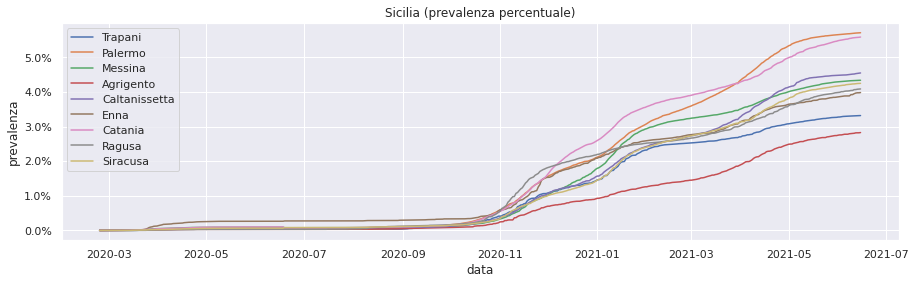

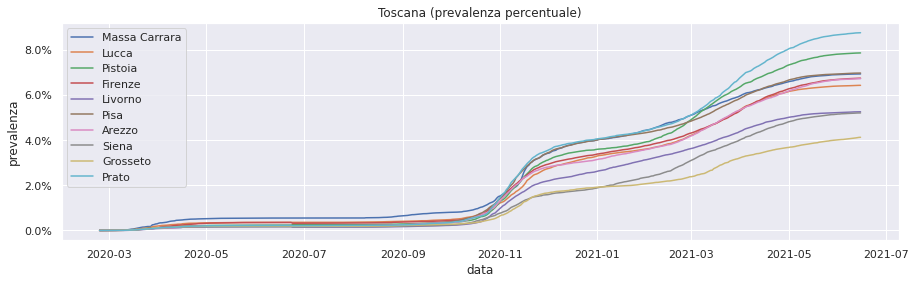

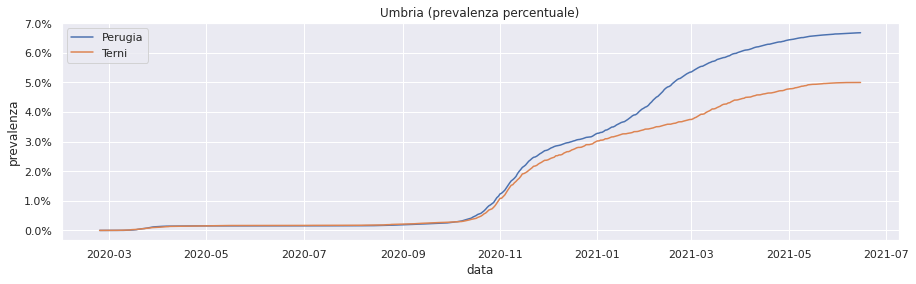

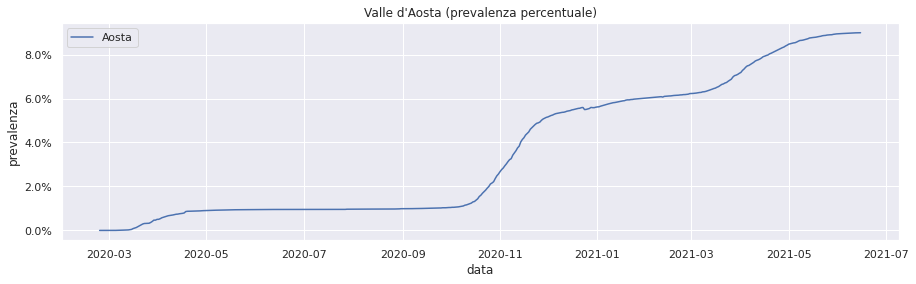

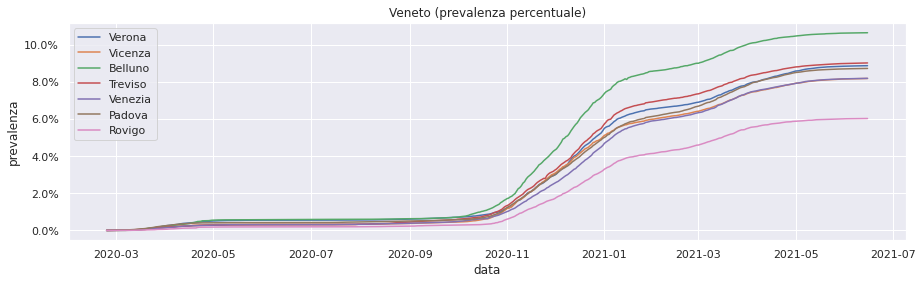

In [21]:
ylim = df.prevalenza.max()

for i, regione in enumerate(sorted(df.denominazione_regione.unique())):
    fig, ax = plt.subplots(figsize=(15, 4))
    _df = df[df.denominazione_regione==regione]
    sns.lineplot(
        data=_df,
        x='data', y='prevalenza',
        hue='denominazione_provincia',
        ax=ax
    )
    ax.set(
        title=f"{regione} (prevalenza percentuale)",
    )
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
    ax.legend(loc='upper left')
    plt.show()
    s = _df[_df.data==_df.data.max()].sort_values(by='denominazione_provincia')[
        ['denominazione_provincia', 'prevalenza']
    ].set_index('denominazione_provincia').style.set_caption(
        f"PREVALENZA in {regione} (ultimi dati)"
    ).format({'prevalenza': '{:.2%}'})
    display(HTML(s.render()))

# Nuovi positivi settimanali

In [22]:
columns = ['data', 'denominazione_regione', 'denominazione_provincia', 'totale_casi', 'popolazione']
DF = None
for prov in df.denominazione_provincia.unique():
    _df = df[df.denominazione_provincia==prov][columns].copy(deep=True)
    regione = _df.denominazione_regione.unique()[0]
    _df['nuovi_positivi'] = _df.totale_casi.diff()
    _DF = _df.set_index(['data']).resample('W', label='right').sum().reset_index()
    _DF['denominazione_provincia'] = prov
    _DF['denominazione_regione'] = regione
    _DF['popolazione'] = _df.popolazione.unique()[0]
    _DF['incidenza'] = _DF.nuovi_positivi / _DF.popolazione * 1e5
    if DF is None:
        DF = _DF
    else:
        DF = DF.append(_DF, ignore_index=True)
DF = DF[DF.data!=DF.data.max()].copy(deep=True)

In [23]:
nmax_df = DF[DF.data==DF.data.max()].sort_values(by='nuovi_positivi', ascending=False).head(10)

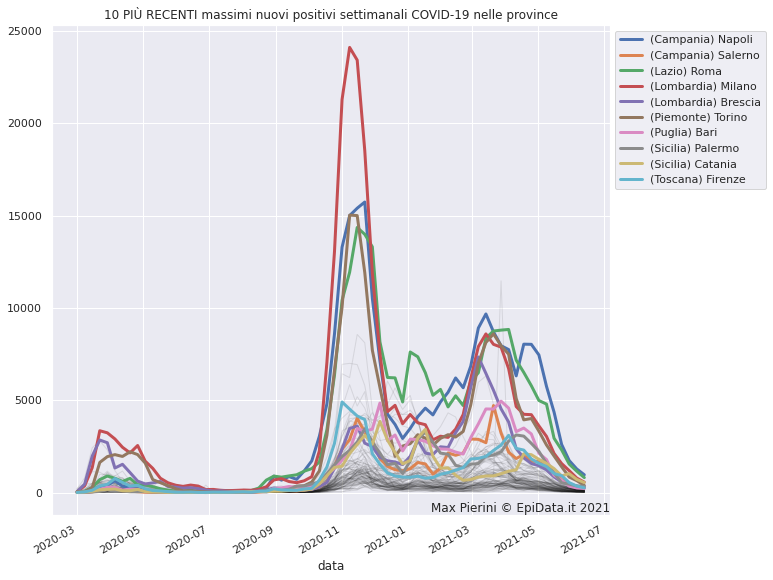

In [24]:
# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

fig, ax = plt.subplots(figsize=(10, 10))

for prov in DF.denominazione_provincia.unique():
    df_prov = DF[DF.denominazione_provincia==prov].copy(deep=True)
    df_prov.loc[df_prov.nuovi_positivi<0, 'nuovi_positivi'] = np.nan
    df_prov.fillna(method='ffill', inplace=True)
    reg = df_prov.denominazione_regione.unique()[0]

    if prov not in nmax_df.denominazione_provincia.values:
        ax.plot(df_prov.data, df_prov.nuovi_positivi, color='k', alpha=.1, lw=1, label=None)
    else:
        df_prov.plot(x='data', y='nuovi_positivi', zorder=100, ax=ax, lw=3, label=f"({reg}) {prov}")
ax.text(
    1, 0,
    'Max Pierini © EpiData.it 2021',
    ha='right', va='bottom',
    transform=ax.transAxes,
    fontsize=12
)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set(
    title='10 PIÙ RECENTI massimi nuovi positivi settimanali COVID-19 nelle province'
)
plt.show()

In [25]:
nmax_df[
    ['denominazione_provincia', 'denominazione_regione', 'nuovi_positivi']
].set_index('denominazione_provincia').style.set_caption(
    "NUOVI POSITIVI SETTIMANALI"
).format({'nuovi_positivi': int})

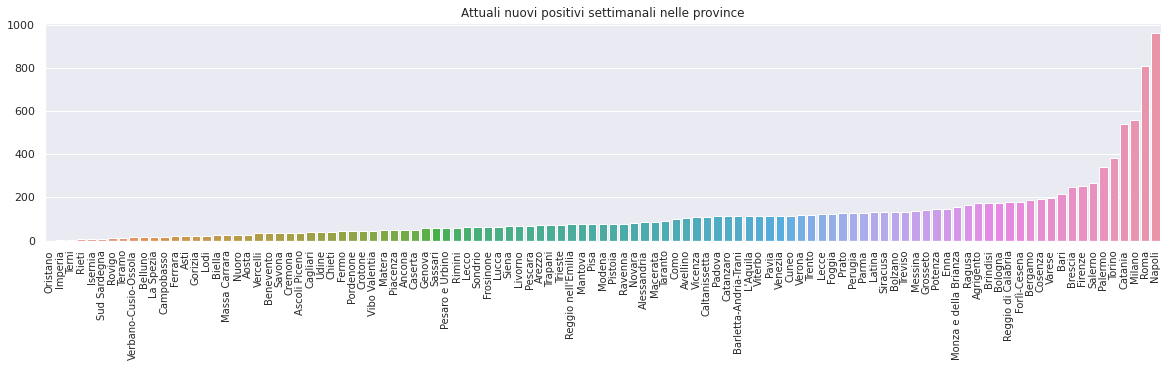

In [26]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(
    data=DF[DF.data==DF.data.max()].sort_values(by='nuovi_positivi'),
    x='denominazione_provincia',
    y='nuovi_positivi',
    ax=ax,
)
plt.xticks(rotation=90, fontsize=10)
ax.set(
    xlabel=None, ylabel=None,
    title='Attuali nuovi positivi settimanali nelle province'
)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
plt.show()

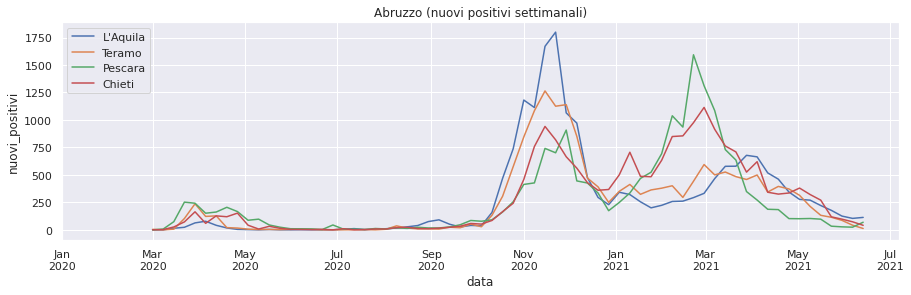

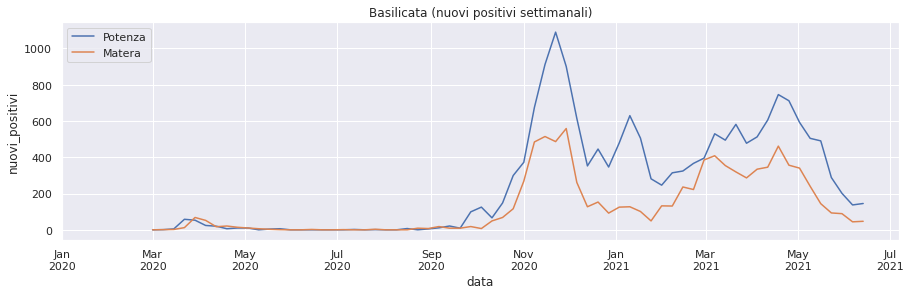

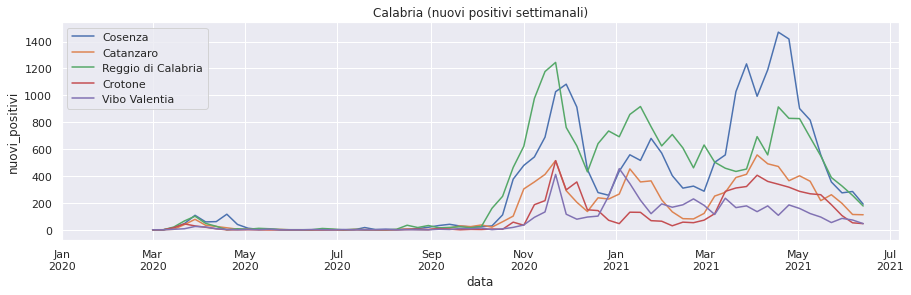

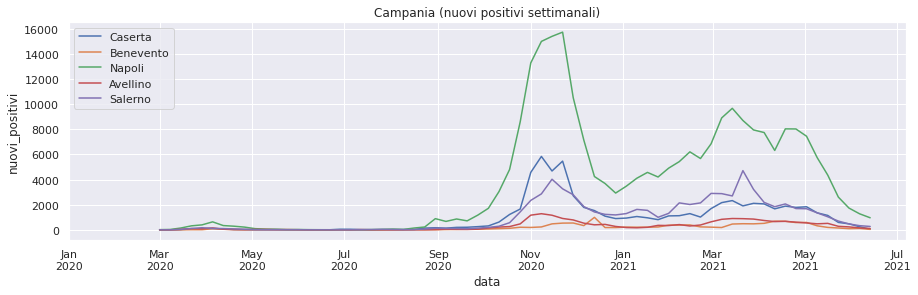

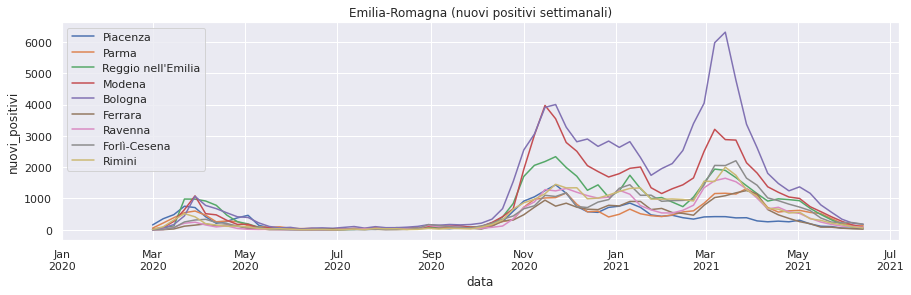

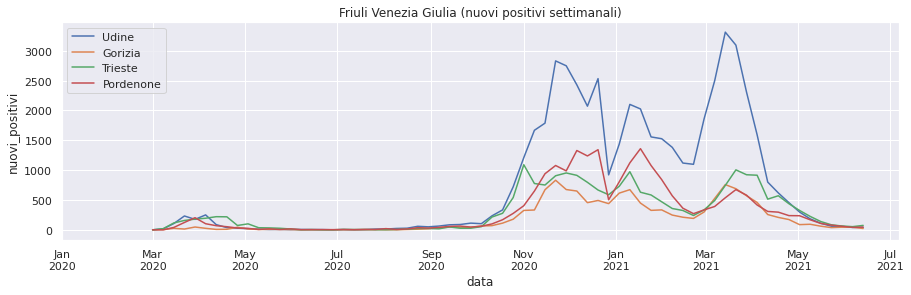

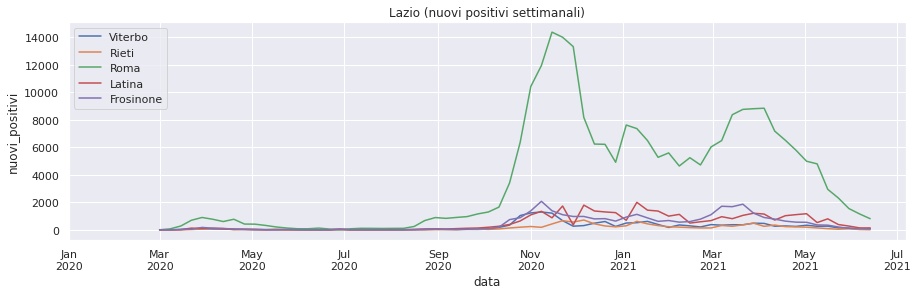

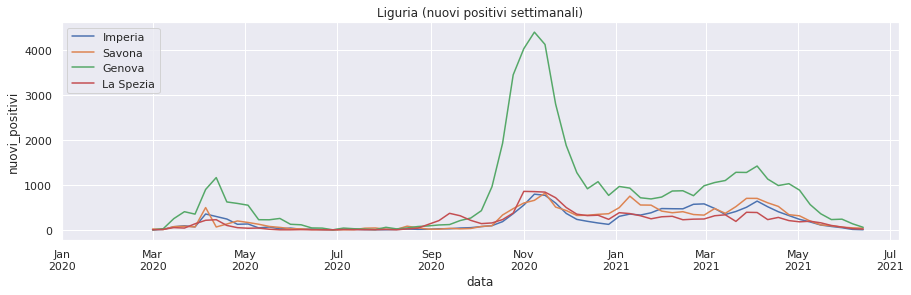

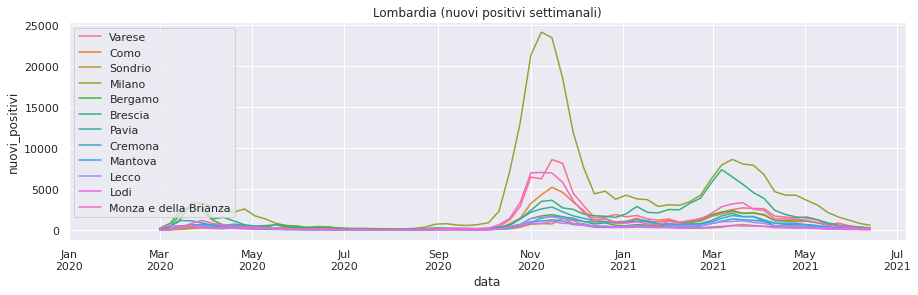

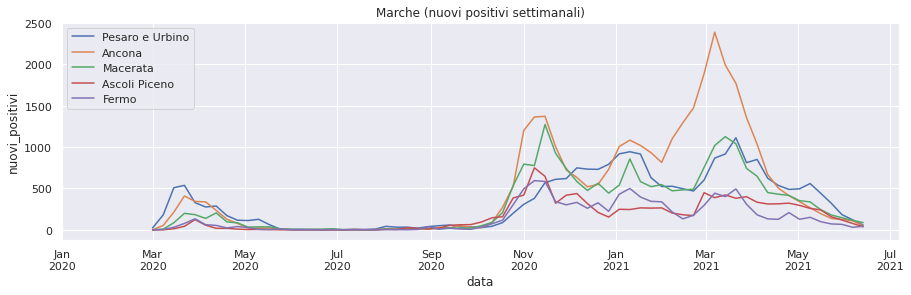

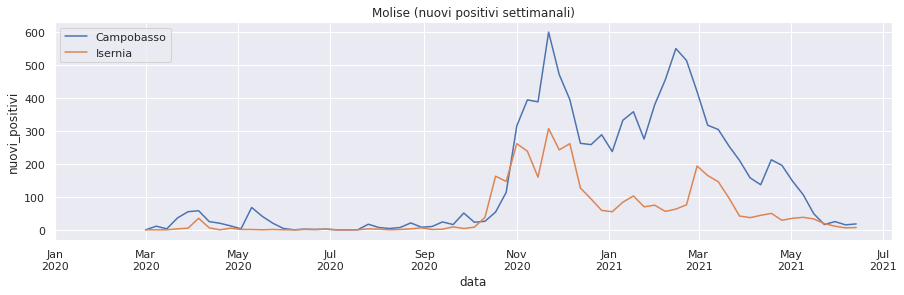

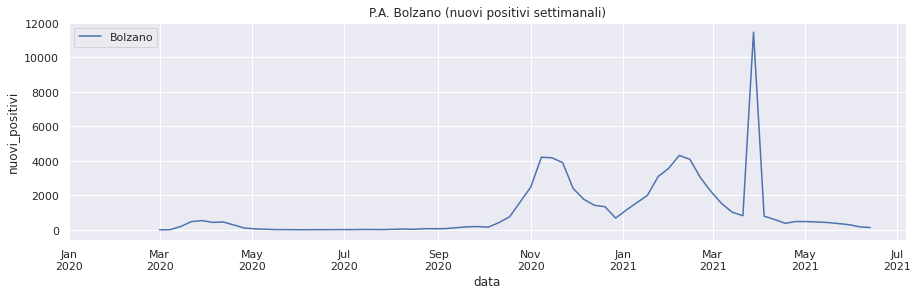

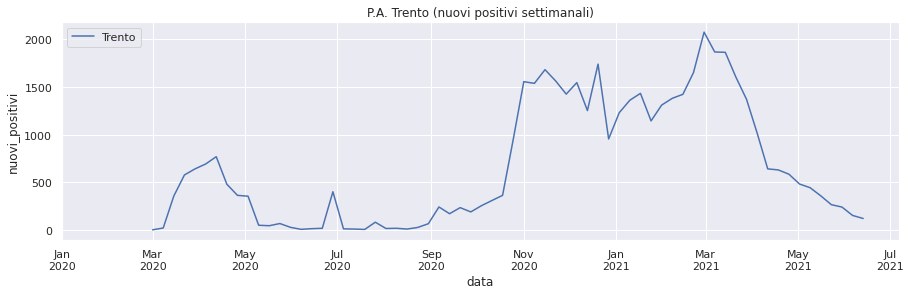

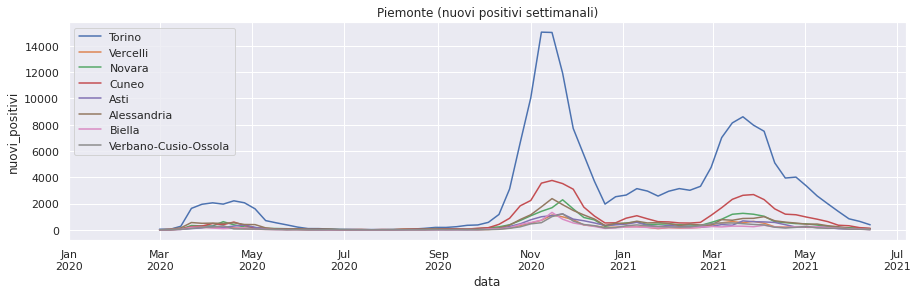

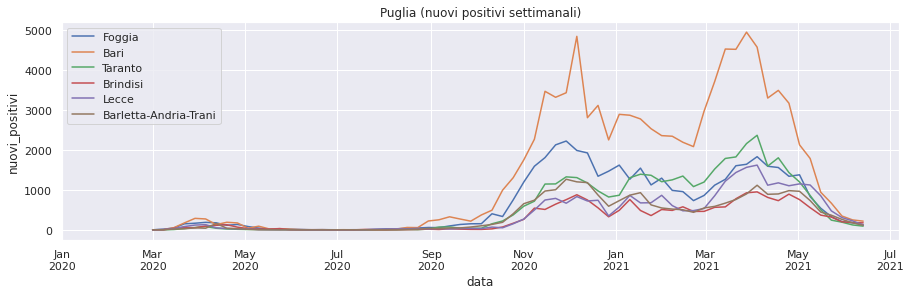

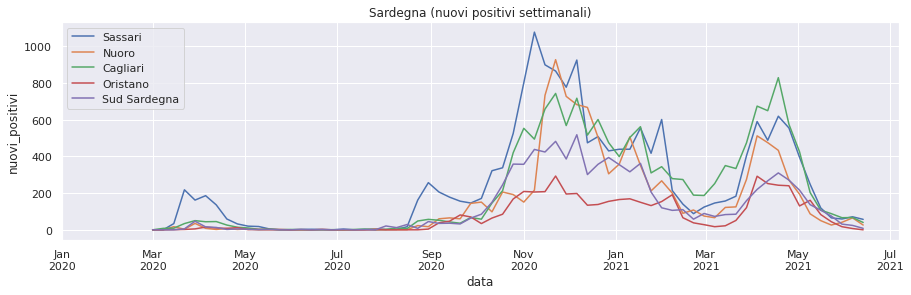

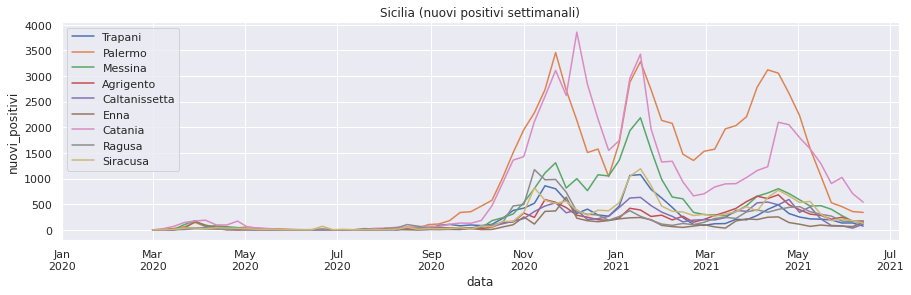

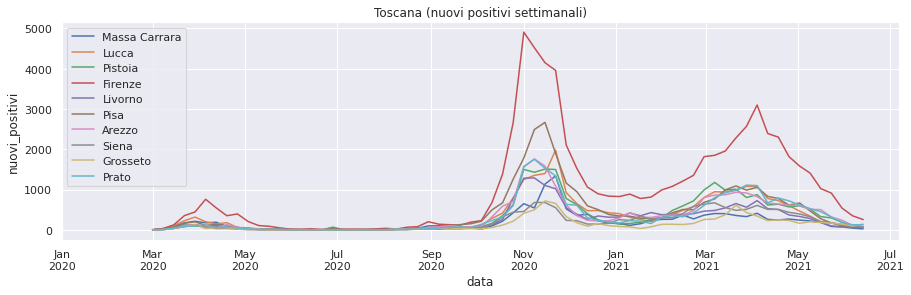

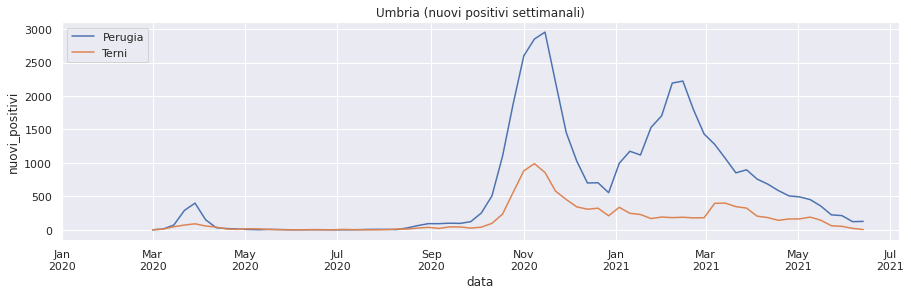

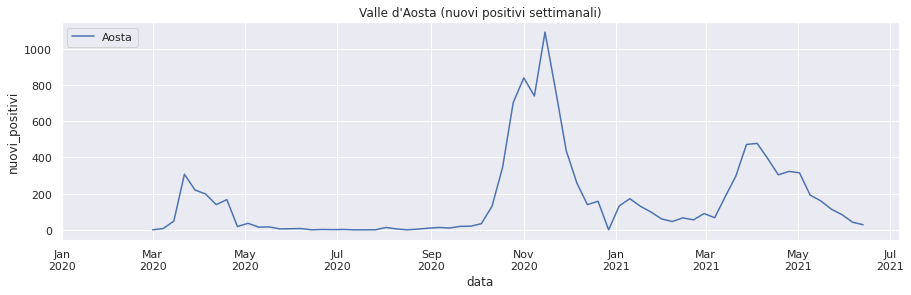

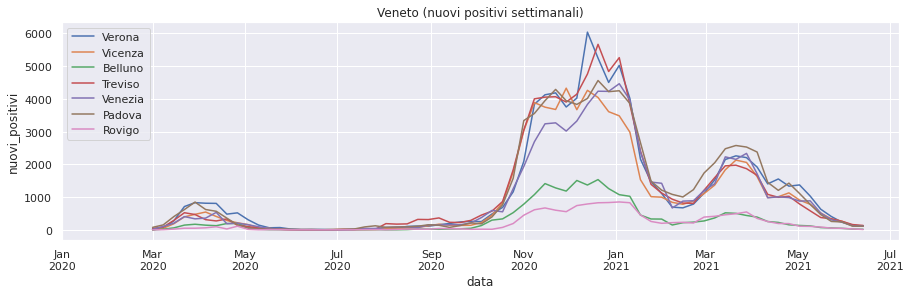

In [27]:
for i, regione in enumerate(sorted(df.denominazione_regione.unique())):
    fig, ax = plt.subplots(figsize=(15, 4))
    _DF = DF[DF.denominazione_regione==regione].copy(deep=True)
    _DF.loc[_DF.nuovi_positivi<0, 'nuovi_positivi'] = 0
    sns.lineplot(
        data=_DF,
        x='data', y='nuovi_positivi',
        hue='denominazione_provincia',
        ax=ax
    )
    ax.set(
        title=f"{regione} (nuovi positivi settimanali)",
        xlim=(pd.to_datetime('2020-01-01'), ax.get_xlim()[1])
    )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax.legend(loc='upper left')
    plt.show()
    s = _DF[_DF.data==_DF.data.max()].sort_values(by='denominazione_provincia')[
        ['denominazione_provincia', 'nuovi_positivi']
    ].set_index('denominazione_provincia').style.set_caption(
        f"NUOVI POSITIVI SETTIMANALI in {regione} (ultimi dati)"
    ).format({'nuovi_positivi': int})
    display(HTML(s.render()))

# Incidenza settimanale

In [28]:
imax_df = DF[DF.data==DF.data.max()].sort_values(by='incidenza', ascending=False).head(10)

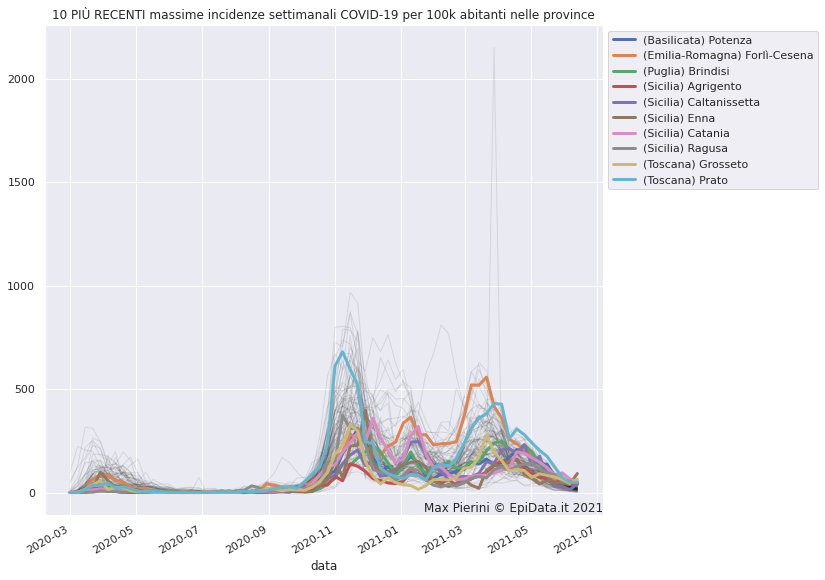

In [29]:
# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

fig, ax = plt.subplots(figsize=(10, 10))

for prov in DF.denominazione_provincia.unique():
    df_prov = DF[DF.denominazione_provincia==prov].copy(deep=True)
    df_prov.loc[df_prov.incidenza<0, 'incidenza'] = np.nan
    df_prov.fillna(method='ffill', inplace=True)
    reg = df_prov.denominazione_regione.unique()[0]

    if prov not in imax_df.denominazione_provincia.values:
        ax.plot(df_prov.data, df_prov.incidenza, color='k', alpha=.1, lw=1, label=None)
    else:
        df_prov.plot(x='data', y='incidenza', zorder=100, ax=ax, lw=3, label=f"({reg}) {prov}")
ax.text(
    1, 0,
    'Max Pierini © EpiData.it 2021',
    ha='right', va='bottom',
    transform=ax.transAxes,
    fontsize=12
)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set(
    title='10 PIÙ RECENTI massime incidenze settimanali COVID-19 per 100k abitanti nelle province'
)
plt.show()

In [30]:
imax_df[
    ['denominazione_provincia', 'denominazione_regione', 'incidenza']
].set_index('denominazione_provincia').style.set_caption(
    "INCIDENZA SETTIMANALE"
).format({'incidenza': int})

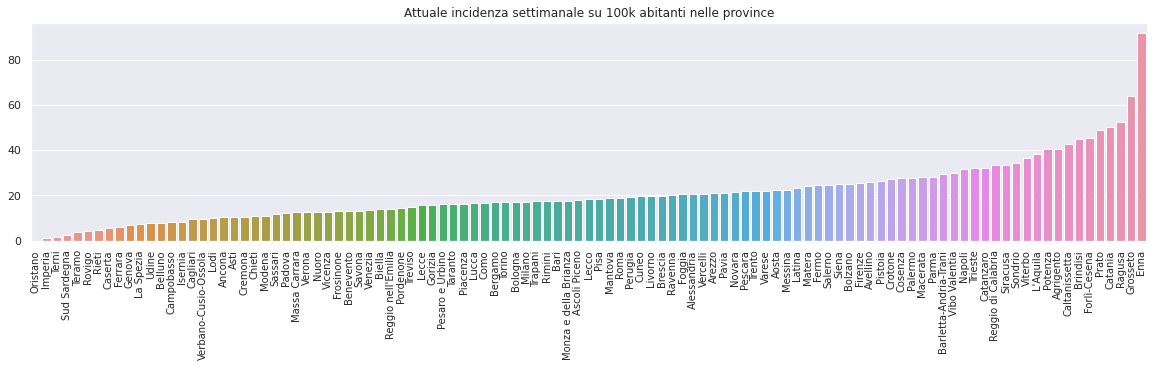

In [31]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(
    data=DF[DF.data==DF.data.max()].sort_values(by='incidenza'),
    x='denominazione_provincia',
    y='incidenza',
    ax=ax,
)
plt.xticks(rotation=90, fontsize=10)
ax.set(
    xlabel=None, ylabel=None,
    title='Attuale incidenza settimanale su 100k abitanti nelle province'
)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
plt.show()

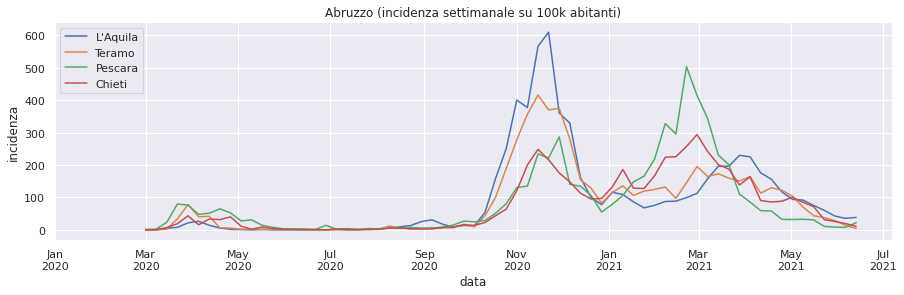

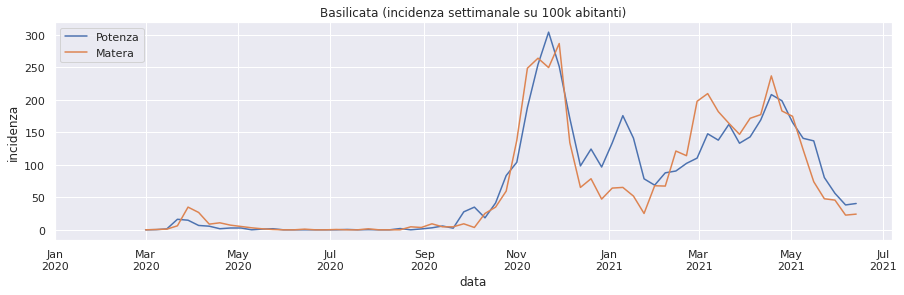

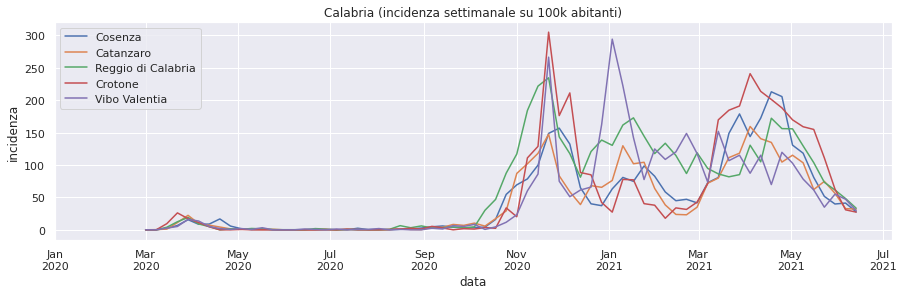

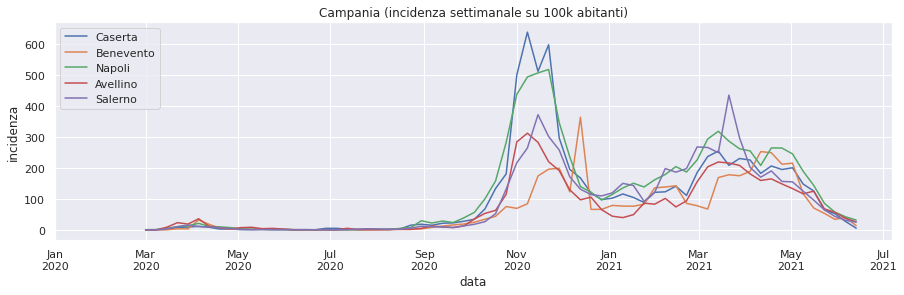

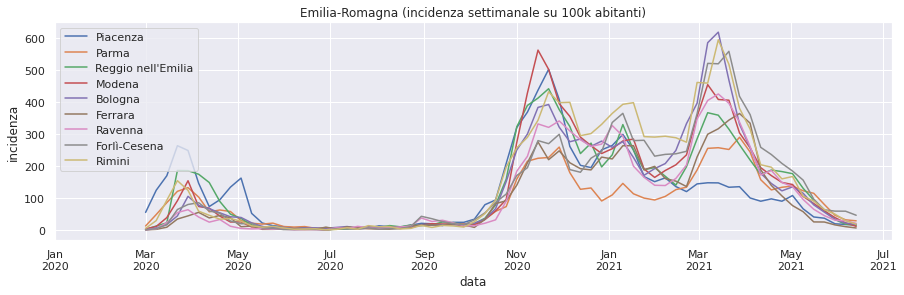

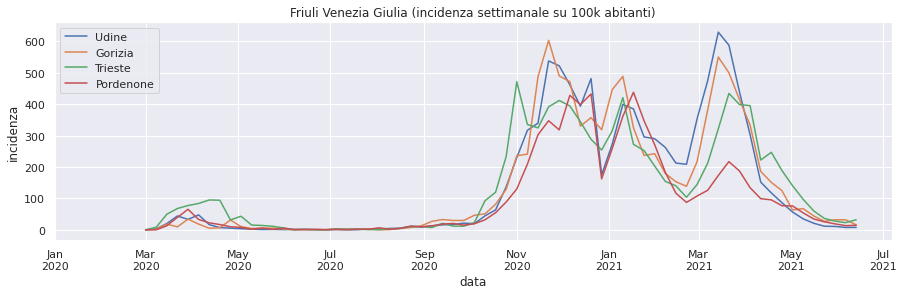

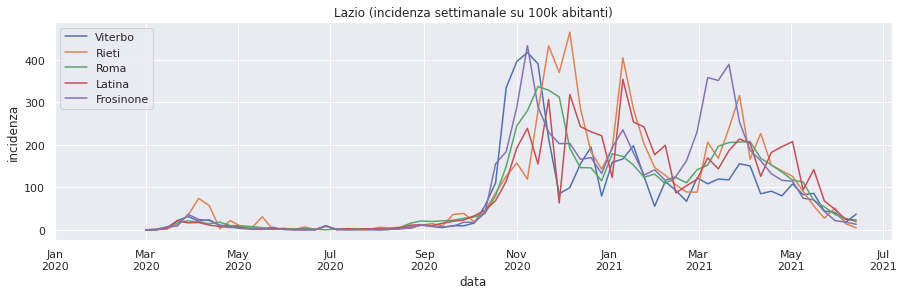

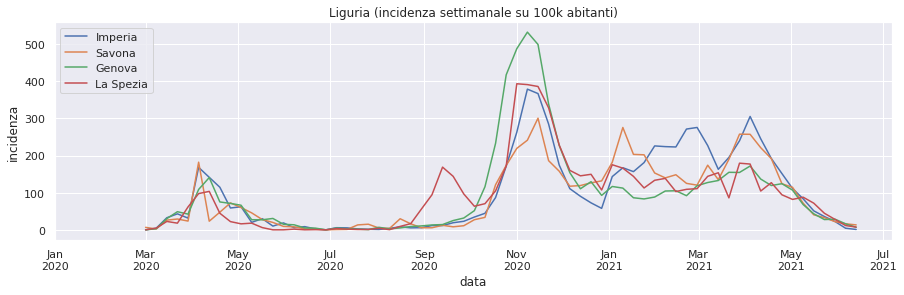

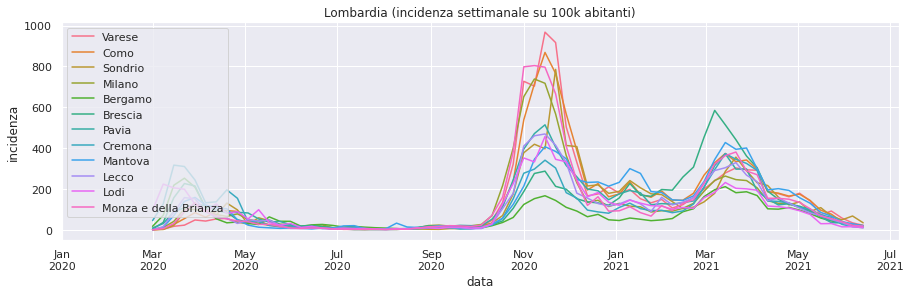

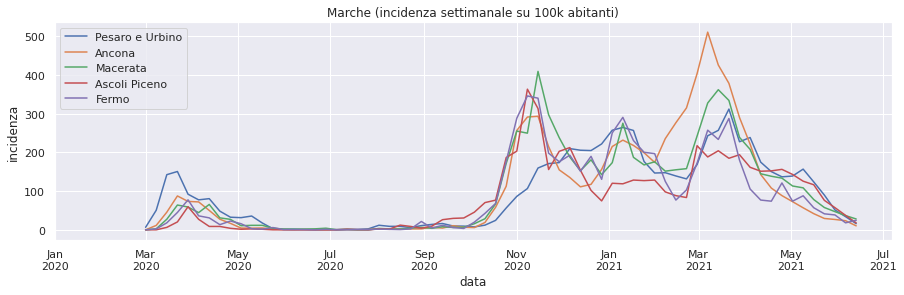

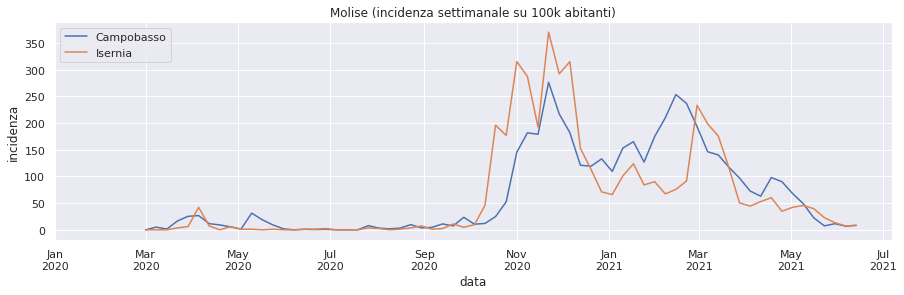

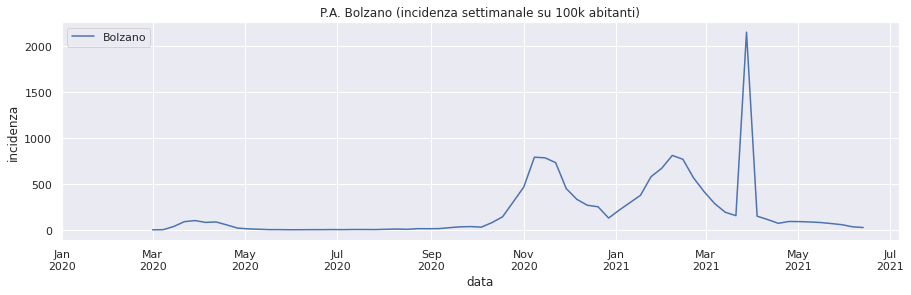

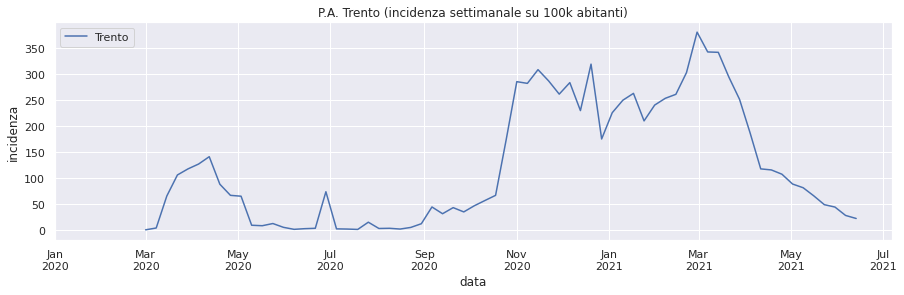

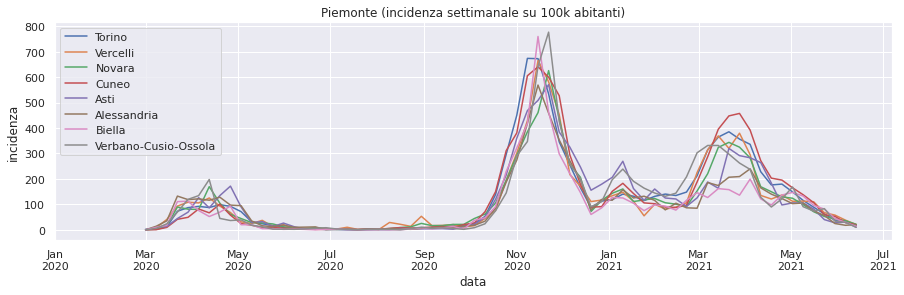

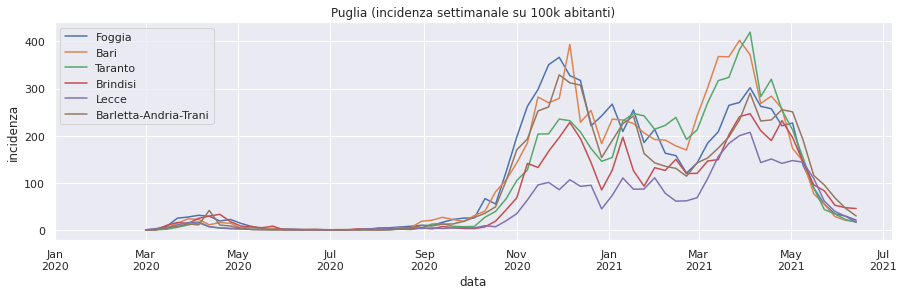

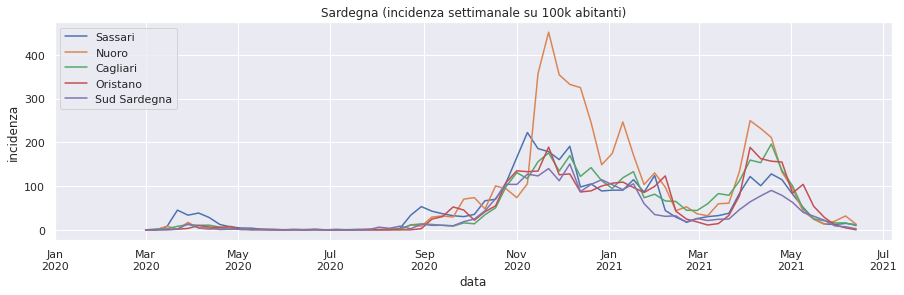

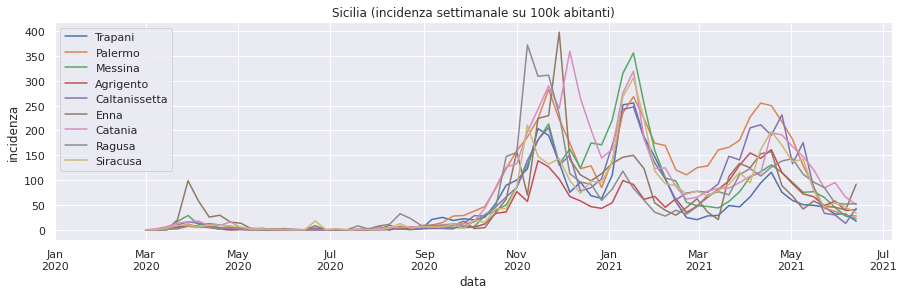

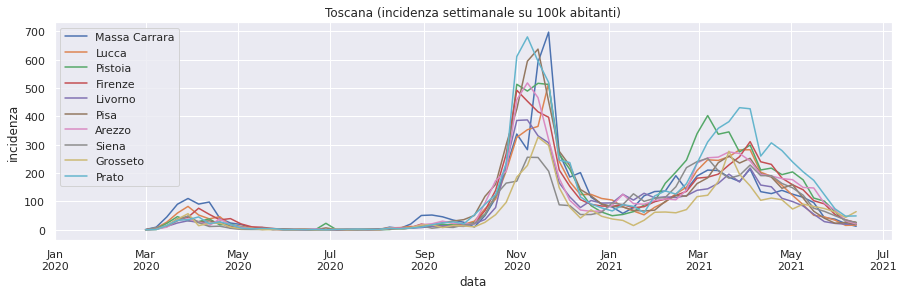

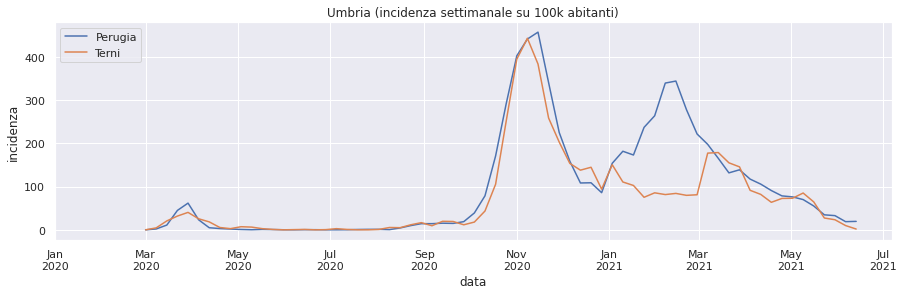

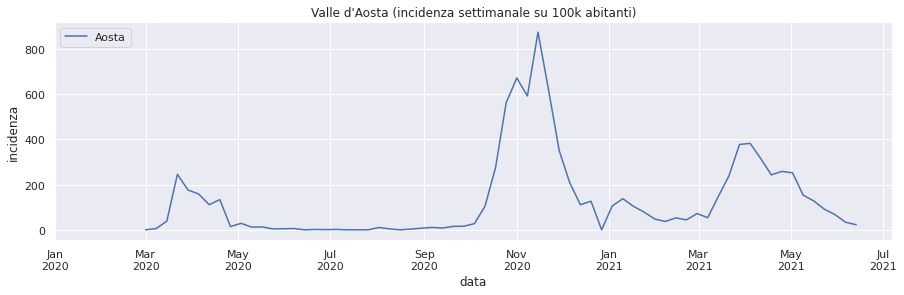

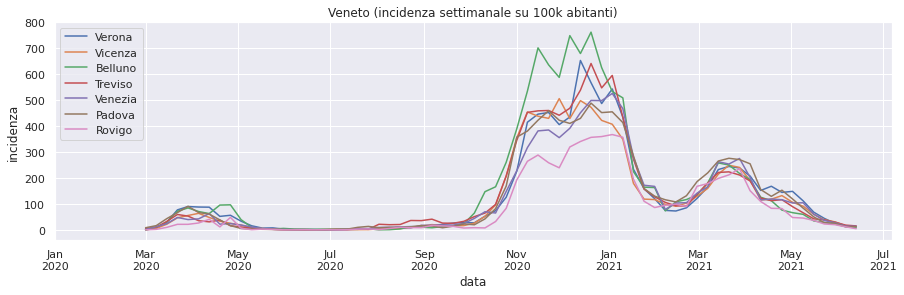

In [32]:
for i, regione in enumerate(sorted(df.denominazione_regione.unique())):
    fig, ax = plt.subplots(figsize=(15, 4))
    _DF = DF[DF.denominazione_regione==regione].copy(deep=True)
    _DF.loc[_DF.incidenza<0, 'incidenza'] = 0
    sns.lineplot(
        data=_DF,
        x='data', y='incidenza',
        hue='denominazione_provincia',
        ax=ax
    )
    ax.set(
        title=f"{regione} (incidenza settimanale su 100k abitanti)",
        xlim=(pd.to_datetime('2020-01-01'), ax.get_xlim()[1])
    )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax.legend(loc='upper left')
    plt.show()
    s = _DF[_DF.data==_DF.data.max()].sort_values(by='denominazione_provincia')[
        ['denominazione_provincia', 'incidenza']
    ].set_index('denominazione_provincia').style.set_caption(
        f"INCIDENZA SETTIMANALE in {regione} (ultimi dati)"
    ).format({'incidenza': int})
    display(HTML(s.render()))

In [33]:
_ = """

province1 = [
    'Bergamo', 'Lodi',
    'Piacenza',
    'Cremona'
]

province2 = [
    'Belluno', 'Bolzano',
    'Treviso',
]



# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(7, 7))

    for prov in df_OK.denominazione_provincia.unique():
        df_prov = df[df.denominazione_provincia==prov].copy(deep=True)
        df_prov.fillna(method='ffill', inplace=True)
        #if prov not in pop.Territorio.values:
        #    print(prov)
        #    continue
        ls = '-'
        if prov in province2:
            ls = '--'
        if prov not in province1 and prov not in province2:
            #continue
            df_prov.plot(x='data', y='incidenza', color='k', alpha=.05, lw=1, ax=ax, legend=None)
        else:
            df_prov.plot(x='data', y='incidenza', zorder=100, ax=ax, lw=3, ls=ls, legend=None)
            fontsize = 12
            y = df_prov.incidenza.values[-1]
            #if prov == 'Treviso':
            #    y += 5000
            #elif prov == 'Verona':
            #    y -= 5000
            #if prov == 'Lodi':
            #    y += .03
            #if prov == 'Milano':
            #    y -= .03
            if prov == 'Napoli':
                y -= .25/100

            ax.annotate(
                prov,
                xy=(df_prov.data.values[-1], df_prov.incidenza.values[-1]),
                xytext=(df_prov.data.values[-1]+pd.Timedelta(days=30), y),
                ha='left', va='center',
                arrowprops=dict(color='k', arrowstyle='<-'), fontsize=fontsize
            )
    for i, p in enumerate(['Cremona', 'Piacenza', 'Bergamo', 'Lodi']):
        data = f"2020-{4+i}-01"
        ax.annotate(
            p,
            xy=(data, df[(df.denominazione_provincia==p)&(df.data==data)].incidenza),
            xytext=(data, 3+i),
            arrowprops=dict(color='k', arrowstyle='<-'),
            ha='center'
        )
    ax.text(
        1, 0,
        'Max Pierini © EpiData.it 2021',
        ha='right', va='bottom',
        transform=ax.transAxes,
        fontsize=12
    )
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
    ax.set(
        title='Casi COVID-19 su 100 abitanti nelle province italiane'
    )
plt.show()

columns = ['data', 'denominazione_provincia', 'totale_casi', 'popolazione']
DF = None
for prov in df.denominazione_provincia.unique():
    _df = df[df.denominazione_provincia==prov][columns].copy(deep=True)
    _df['nuovi_positivi'] = _df.totale_casi.diff()
    _DF = _df.set_index(['data']).resample('W').sum().reset_index()
    _DF['denominazione_provincia'] = prov
    _DF['popolazione'] = _df.popolazione.unique()[0]
    if DF is None:
        DF = _DF
    else:
        DF = DF.append(_DF, ignore_index=True)

DF

province1a = [
    'Bergamo', 'Lodi', 'Torino', 'Monza e della Brianza', 'Brescia'
]
province2a = [
    'Milano', 'Napoli', 'Roma', 'Varese', 
]

# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(7, 7))

    for prov in DF.denominazione_provincia.unique():
        df_prov = DF[DF.denominazione_provincia==prov][:-1].copy(deep=True)
        df_prov.fillna(method='ffill', inplace=True)
        #if prov not in pop.Territorio.values:
        #    print(prov)
        #    continue
        ls = '-'
        if prov in province2a:
            ls = '--'
        if prov not in province1a and prov not in province2a:
            #continue
            df_prov.plot(x='data', y='nuovi_positivi', color='k', alpha=.1, lw=1, ax=ax, legend=None)
        else:
            df_prov.plot(x='data', y='nuovi_positivi', zorder=100, ax=ax, lw=3, ls=ls, legend=None)
            fontsize = 12
            y = df_prov.nuovi_positivi.max()
            if prov == 'Bergamo':
                y = df_prov[df_prov.data>='2020-06-01'].nuovi_positivi.max()
            #elif prov == 'Verona':
            #    y -= 5000
            #if prov == 'Lodi':
            #    y += .03
            #if prov == 'Milano':
            #    y -= .03
            #if prov == 'Napoli':
            #    y -= .25/100

            ax.annotate(
                prov if prov != 'Monza e della Brianza' else 'Monza',
                xy=(df_prov[df_prov.nuovi_positivi==y].data.values[0], y),
                xytext=(df_prov.data.values[-1]+pd.Timedelta(days=30), y),
                ha='left', va='center',
                arrowprops=dict(color='k', arrowstyle='<-'), fontsize=fontsize
            )
    for i, p in enumerate(['Cremona', 'Piacenza', 'Bergamo', 'Lodi']):
        data = f"2020-{4+i}-01"
        #ax.annotate(
        #    p,
        #    xy=(data, DF[(DF.denominazione_provincia==p)&(DF.data==data)].nuovi_positivi),
        #    xytext=(data, 3+i),
        #    arrowprops=dict(color='k', arrowstyle='<-'),
        #    ha='center'
        #)
    ax.text(
        1, 0,
        'Max Pierini © EpiData.it 2021',
        ha='right', va='bottom',
        transform=ax.transAxes,
        fontsize=12
    )
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
    ylim = ax.get_ylim()
    yticks = ax.get_yticks()
    ax.set(
        title='Casi COVID-19 settimanali nelle province italiane',
        yticks=yticks,
        yticklabels=[f"{i/1000:.0f} K" for i in yticks],
        ylim=ylim
    )
plt.show()

DF['incidenza'] = DF.nuovi_positivi / DF.popolazione * 100000

prov1 = ['Cremona', 'Lodi', 'Bergamo', 'Piacenza']
prov2 = ['Varese', 'Belluno', 'Bolzano', 'Aosta', 'Brescia']

# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

c1 = 0
c2 = 0

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(7, 7))

    for prov in DF.denominazione_provincia.unique():
        df_prov = DF[DF.denominazione_provincia==prov].copy(deep=True).iloc[:-1]
        df_prov.loc[df_prov.incidenza<0, 'incidenza'] = np.nan
        df_prov.fillna(method='ffill', inplace=True)
        #if prov not in pop.Territorio.values:
        #    print(prov)
        #    continue
        if prov in prov2:
            ls = '--'
            c = c2
            c2 += 1
        if prov in prov1:
            ls = '-'
            c = c1
            c1 += 1
        if prov not in prov1 and prov not in prov2:
            #continue
            df_prov.plot(x='data', y='incidenza', color='k', alpha=.1, lw=1, ax=ax, legend=None)
        else:
            df_prov.plot(
                x='data', y='incidenza', zorder=100, ax=ax, lw=3, ls=ls, legend=None,
                color=f'C{c}'
            )
            fontsize = 12
            y = df_prov.incidenza.max()
            if prov == 'Bolzano':
                y = df_prov.incidenza.values[-1]
            elif prov == 'Bergamo':
                y = df_prov[df_prov.data>'2020-05-01'].incidenza.max()
            #if prov == 'Lodi':
            #    y += .03
            #if prov == 'Milano':
            #    y -= .03
            #if prov == 'Napoli':
            #    y -= .25/100

            ax.annotate(
                prov,
                xy=(
                    df_prov[df_prov.incidenza==y].data.values[0], 
                    y
                ),
                xytext=(df_prov.data.values[-1]+pd.Timedelta(days=30), y),
                ha='left', va='center',
                arrowprops=dict(color='k', arrowstyle='<-'), fontsize=fontsize
            )
    for i, p in enumerate(['Cremona', 'Piacenza', 'Bergamo', 'Lodi']):
        data = f"2020-{4+i}-01"
        #ax.annotate(
        #    p,
        #    xy=(data, DF[(DF.denominazione_provincia==p)&(DF.data==data)].nuovi_positivi),
        #    xytext=(data, 3+i),
        #    arrowprops=dict(color='k', arrowstyle='<-'),
        #    ha='center'
        #)
    ax.text(
        1, 0,
        'Max Pierini © EpiData.it 2021',
        ha='right', va='bottom',
        transform=ax.transAxes,
        fontsize=12
    )
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
    ax.set(
        title='Incidenza settimanale COVID-19 su 100k abitanti'
    )
plt.show()

fixed_pop.to_csv('province_popolazione_2021.csv', index=False)

it = pd.read_csv(
    "https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/"
    "dpc-covid19-ita-andamento-nazionale.csv",
    parse_dates=['data'], index_col='data'
)
it.index = it.index.normalize()

ax = it['nuovi_positivi'].resample('W').sum().plot()
DF.groupby('data').nuovi_positivi.sum().plot(ax=ax)

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    df[df.denominazione_provincia=='Bergamo'].plot(
        x='data', y='totale_casi',
        label='Bergamo',
        ax=ax[0,0]
    )
    df[df.denominazione_provincia=='Brescia'].plot(
        x='data', y='totale_casi',
        label='Brescia',
        ax=ax[0,0]
    )
    ax[0,0].set(
        title='Casi totali'
    )
    
    df[df.denominazione_provincia=='Bergamo'].plot(
        x='data', y='incidenza',
        label='Bergamo',
        ax=ax[0,1]
    )
    df[df.denominazione_provincia=='Brescia'].plot(
        x='data', y='incidenza',
        label='Brescia',
        ax=ax[0,1]
    )
    ax[0,1].set(
        title='Casi su 100 abitanti'
    )
    
    DF[DF.denominazione_provincia=='Bergamo'][:-1].plot(
        x='data', y='nuovi_positivi',
        label='Bergamo',
        ax=ax[1,0]
    )
    DF[DF.denominazione_provincia=='Brescia'][:-1].plot(
        x='data', y='nuovi_positivi',
        label='Brescia',
        ax=ax[1,0]
    )
    ax[1,0].set(
        title='Nuovi casi settimanali'
    )
    
    DF[DF.denominazione_provincia=='Bergamo'][:-1].plot(
        x='data', y='incidenza',
        label='Bergamo',
        ax=ax[1,1]
    )
    DF[DF.denominazione_provincia=='Brescia'][:-1].plot(
        x='data', y='incidenza',
        label='Brescia',
        ax=ax[1,1]
    )
    ax[1,1].set(
        title='Incidenza settimanale su 100k'
    )
    for a in ax.flat:
        a.legend(loc='upper center')
        a.set(
            xlabel=None
        )
    ax[1,1].text(
        1.05, 0,
        'Max Pierini © EpiData.it 2021',
        ha='right', va='bottom',
        rotation=90,
        transform=ax[1,1].transAxes,
        fontsize=10
    )
    ax[0,1].axvline('2020-11-01', ls='--', color='k')
    ax[1,1].axvline('2020-11-01', ls='--', color='k', lw=2)

    fig.suptitle('Casi di COVID-19 nelle province di Bergamo e Brescia', fontsize=24, y=.95)"""